<a href="https://colab.research.google.com/github/a2r4vind/Machine-Learning-Models/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Necessary imports
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

MNIST Fashion Dataset is included in keras and consists of 60,000 images for training and 10,000 images for validation/testing

In [3]:
# loading the dataset from keras
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data() # split the data into testing and training

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# shape of the train dataset
train_images.shape
# type(train_images)

(60000, 28, 28)

The output above tells that there are 60,000 images which are made of 28x28 pixels(= 784 in total)

In [5]:
# accessing one pixel
train_images[0,23,23]

194

Here we have grayscale images ie there are no color. Here pixel value is between 0 - 255 (0 = black and 255 = white)

In [6]:
# lets see the first 10 training labels
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

above output shows integer values ranging from 0 - 9 each integer represent a specific article of clothing. So lets give label name

In [7]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

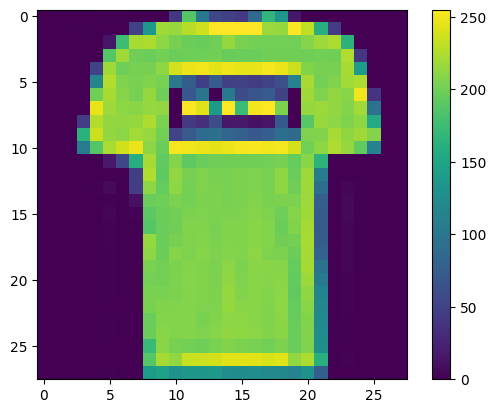

In [26]:
plt.figure()
plt.imshow(train_images[1])
plt.colorbar()
plt.grid(False)
plt.show()

DATA PREPROCESSING

Before creating our model data need to be preprocessed meaning some prior transformations to our data before providing it to the model. Here we can scall all of the grayscale pixel values (0-255) to be between 0 and 1 by dividing each value in the training and testing sets by 255.0. We do this because smaller values will make it easier for the model to process our values.

In [27]:
train_images = train_images / 255.0
test_images = test_images / 255.0

For building the model we are going to use keras sequential model with 3 different layers. This model represents the feed forward neural network(one that passes values from left to right).

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # input layer (1)
    keras.layers.Dense(128, activation= 'relu'), # hidden layer (2)
    keras.layers.Dense(10, activation= 'softmax') # output layer (3)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compile the Model

Here we define the loss/cost function, optimizer and metrics we would like to track.

In [30]:
model.compile(optimizer = 'adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Training and fitting the model

In [31]:
model.fit(train_images, train_labels, epochs= 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7834 - loss: 0.6281
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8609 - loss: 0.3848
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8783 - loss: 0.3357
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.8863 - loss: 0.3133
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8890 - loss: 0.2983
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8980 - loss: 0.2798
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9012 - loss: 0.2706
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9069 - loss: 0.2497
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9074 - loss: 0.2491
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9110 - loss: 0.2367


Evaluating the model

In [33]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1) #verbose: 0 or 1, mode 0 = silent and mode 1 = progess bar
print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8816 - loss: 0.3436
Test accuracy: 0.8798999786376953
Test loss: 0.3404863774776459


Prediction

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Trouser


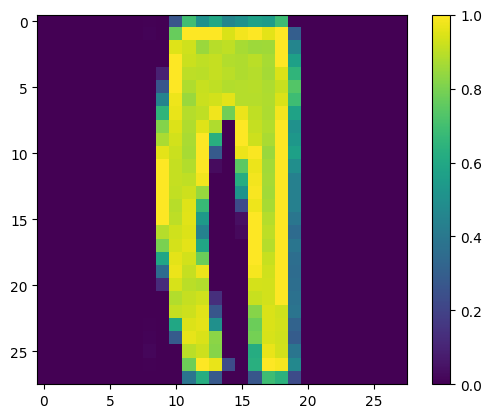

In [43]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[2])])
plt.figure()
plt.imshow(test_images[2])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a number: 45
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


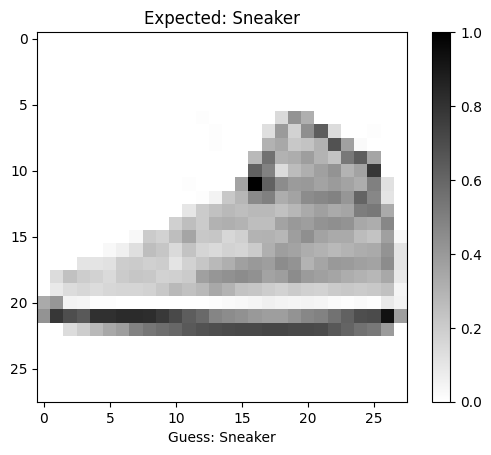

In [55]:
COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR

def predict(model, image, correct_label):
  class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat',
                 'Sandal','Shirt','Sneaker','Bag','Ankle boost']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label], predicted_class)


def show_image(img, label, guess):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.title("Expected: "+label)
  plt.xlabel("Guess: "+guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()

def get_number():
  while True:
    num = input('Pick a number: ')
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return num
      else:
        print('Try again...')

num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image, label)